<a href="https://colab.research.google.com/github/ilkzeyden/call-center-customer-conversationsclustering-and-classification/blob/main/bert2_customer_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kütüphane yükle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#bertopic kullanmak için
!pip install bertopic
!pip install transformers==4.11.3
!pip install tokenizers==0.10.3
!pip install sentencepiece==0.1.96
from bertopic import BERTopic
from transformers import AutoModel, AutoTokenizer # bert için içeri aktardığımız önceden eğitilmiş embedding modeli kendi modelimizde kullanabilmek için bazı işlemlerden geçirtmek için bu kütüphaneden yararlanılır.
import pandas as pd # veriyi excelden almak ve veriyle önişlemler gerçekleşitrmek için kütüphane
!pip install wordcloud==1.8.1
from wordcloud import WordCloud # veride geçen en çok kelimeleri görselleştirmek için kelime bulutu kütüphanesi
import matplotlib.pyplot as plt # grafik oluşturmak için kütüphane
!pip install gensim==4.1.2 # konu modellemek için gensim'in bazı modüllerinden yararlanılır.
import gensim.corpora as corpora # veriyi lda modelinde kullanmak için sözlük modülü
from gensim.models.coherencemodel import CoherenceModel # modeli değerlendirmek için modül
import nltk # türkçe stopwords'leri kullanmak için
import re # yazıları daha anlaşılır yapmak için veri değiştirme kütüphanesi
from nltk.tokenize import RegexpTokenizer # Cümleleri makine için daha anlaşılır yapmak için bölmek için modül
from collections import Counter # veride geçen kelimeleri saydırmak için kütüphane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 9.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 M

# veri yükle

In [ ]:
import pandas as pd
folder_path = '/content/drive/My Drive/Metin/df_5_toplam.xlsx'




df=pd.read_excel(folder_path)

df.drop(columns=['Baskın Konu'],inplace=True)
df

,Unnamed: 0,Yazı
0,0,kaldım saat derecede evde sırf...
1,1,faruk klima gece ilk çalıştırdım yapıla...
2,2,çalışmalar ceylan televizyon yeni ...
3,3,çamaşır makine sorun servis talep edecek...
4,4,ezgi televizyon arıza ücret paneli gidiş...
...,...,...
8979,8979,ibrahim klima kurulum buray...
8980,8980,görüntülü anlamam telefon ısıtmıy...
8981,8981,telefon garanti oraya kayıtımın almışlardı ...
8982,8982,işler yorum durumum vardı media mar...


# veri önişle

In [ ]:
# Müşterilerin söylediklerinde geçen en çok 100 kelime
#Counter(" ".join(df["CustomerText"]).split()).most_common(100)
Counter(" ".join(df["Yazı"]).split()).most_common(100)

[('telefon', 12911),
 ('televizyon', 10209),
 ('servis', 7915),
 ('makine', 6574),
 ('garanti', 6152),
 ('k', 4248),
 ('ekran', 4102),
 ('ses', 3687),
 ('a', 3655),
 ('arıza', 3588),
 ('ayar', 3521),
 ('internet', 3401),
 ('kadar', 3131),
 ('yeni', 3035),
 ('yazıyor', 2799),
 ('aynı', 2747),
 ('çamaşır', 2688),
 ('sıkıntı', 2555),
 ('ediyorum', 2432),
 ('istiyorum', 2368),
 ('sorun', 2339),
 ('oluyor', 2149),
 ('buzdolap', 2147),
 ('w', 2045),
 ('vardı', 1979),
 ('su', 1946),
 ('lazım', 1924),
 ('gerekiyor', 1897),
 ('yıl', 1848),
 ('g', 1827),
 ('kendi', 1817),
 ('kodu', 1809),
 ('kaç', 1732),
 ('herhangi', 1637),
 ('normal', 1577),
 ('evde', 1546),
 ('bakayım', 1508),
 ('şifre', 1498),
 ('içinde', 1490),
 ('uygulama', 1472),
 ('arıyorum', 1465),
 ('geri', 1440),
 ('mail', 1384),
 ('çalışmıyor', 1366),
 ('b', 1354),
 ('ilk', 1351),
 ('yalnız', 1350),
 ('sene', 1321),
 ('devam', 1310),
 ('oradan', 1309),
 ('çıktı', 1279),
 ('çalışıyor', 1260),
 ('sistem', 1243),
 ('destek', 1183),
 ('y

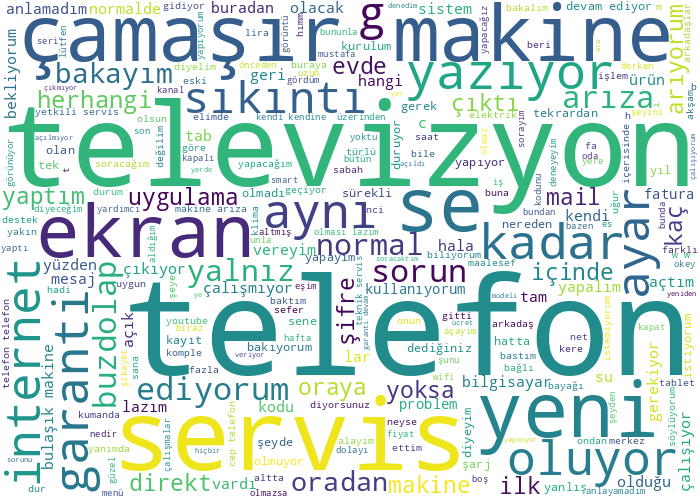

In [ ]:
# kelime bulutu en çok 250 kelime
#long_string = ','.join(list(df['CustomerText'].values))
long_string = ','.join(list(df['Yazı'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

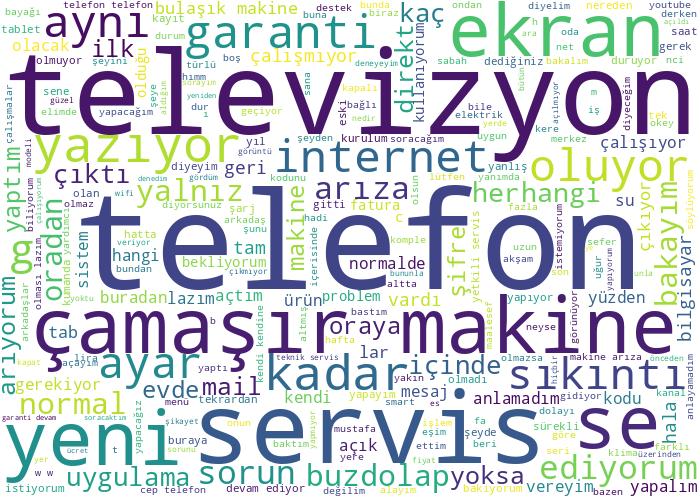

In [ ]:
# kelime bulutu en çok 250 kelime
#long_string = ','.join(list(df['CustomerText'].values))
long_string = ','.join(list(df['Yazı'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()


In [ ]:
# Herhangi bir liste olup olmadığını kontrol edin
#print(df['CustomerText'].apply(lambda x: isinstance(x, list)).sum())
print(df['Yazı'].apply(lambda x: isinstance(x, list)).sum())

# Eğer listeler varsa, bu hücreleri metin olarak birleştirin veya uygun şekilde işleyin
#df['CustomerText'] = df['CustomerText'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


0


In [ ]:
pip install --upgrade bertopic sentence-transformers numpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 84.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [ ]:
import numpy as np
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-128k-cased")
model = AutoModel.from_pretrained("dbmdz/bert-base-turkish-128k-cased")

In [ ]:
model_name = "dbmdz/bert-base-turkish-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


seed_topic_list = [
    ['ankastre', 'fırın', 'set', 'üstü', 'davlumbaz', 'mikro', 'dalga'],
    ['bulaşık'],
    ['buzdolap'],
    ['telefon'],
    ['süpürge'],
    ['sinema', 'sistem'],
    ['fotoğraf', 'makine'],
    ['klima'],
    ['monitör'],
    ['bilgisayar'],
    ['televizyon'],
    ['yazıcı'],
    ['çamaşır'],
    ['tablet']
]

# BERTopic modelini oluşturma
topic_model = BERTopic(embedding_model=model, language='turkish', nr_topics=14, n_gram_range=(1, 2), verbose=True)

# Metinleri bert tabanlı embedings'e dönüştürme
embeddings = SentenceTransformer(model_name).encode(df['Yazı'].tolist(), show_progress_bar=True)

# Konu modelleme
topics, _ = topic_model.fit_transform(df['Yazı'].tolist(), embeddings)

# Belge başına olasılık hesaplama
probs = topic_model.transform(df['Yazı'].tolist())

# Embedings şekil doğrulama
print("Embeddings'in şekli:", embeddings.shape)
representative_docs = topic_model.get_representative_docs()
print("Her bir konu için temsili belgeler:", representative_docs)



Batches:   0%|          | 0/281 [00:00<?, ?it/s]

2024-06-23 17:39:16,956 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-23 17:39:27,985 - BERTopic - Dimensionality - Completed ✓
2024-06-23 17:39:27,987 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-23 17:39:28,342 - BERTopic - Cluster - Completed ✓
2024-06-23 17:39:28,343 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-23 17:39:32,809 - BERTopic - Representation - Completed ✓
2024-06-23 17:39:32,833 - BERTopic - Topic reduction - Reducing number of topics
2024-06-23 17:39:32,835 - BERTopic - Topic reduction - Reduced number of topics from 2 to 2


Batches:   0%|          | 0/281 [00:00<?, ?it/s]

2024-06-23 17:39:49,346 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
2024-06-23 17:42:32,174 - BERTopic - Dimensionality - Completed ✓
2024-06-23 17:42:32,175 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-06-23 17:42:32,650 - BERTopic - Cluster - Completed ✓


Embeddings'in şekli: (8984, 768)
Her bir konu için temsili belgeler: {0: ['            ', '          ', '              '], 1: [' emre   telefon bölümü    biraz  melisa yanımda  görüşmüştük ondan    arkadaşınızla görüştük  telefon internet iyiydi televizyon youtube  şeyleri izlemeye çalışıyorum yapamıyorum olmuyor önceden izleyeb yordum    televizyon yuttum    binanın internet problem olduğu telefon internet geçirme çalışıyorum önceden buluyordu  olmuyor sinan kavas  galaxy a  galaxy a  telefon kadın şeye televizyon modeli   müydü biraz  satmıştık  h evde büyük ekran  ler  kablosuz tab kablosuz şeyle telefon erişim noktasıyla izliyordum önceden  olmuyor sorunun yaşıyoruz   telefon televizyon youtube a  çalışıyorum   kurulumunu        yoksa aktarıyor bağlantı telefon  telefon   wifi  kapalı  açık ana sayfada   ayar   başta  okundu dokundum açık  çıktım basıyorum ma    gördüm led göründüğü  televizyon telefon wifisini açıp kapatayım televizyon wifi  açıyorum  söyleyin   müşteri televizyon

#model

# model sonuçları

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,35,0____,"[, , , , , , , , , ]","[ , , ]"
1,1,8949,1_telefon_televizyon_servis_makine,"[telefon, televizyon, servis, makine, garanti,...",[ emre telefon bölümü biraz melisa yanım...


In [ ]:
for i in range(14):
    print([i+1],'. konu: ',topic_model.get_topic(i) ,'\n')

[1] . konu:  [('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05), ('', 1e-05)] 

[2] . konu:  [('telefon', 0.03315619444834145), ('televizyon', 0.02767880373252813), ('servis', 0.02269118090137781), ('makine', 0.01959466688632734), ('garanti', 0.01858725503857004), ('ekran', 0.013415169864312773), ('ses', 0.012299964393443247), ('arıza', 0.012029813971041659), ('ayar', 0.011846037723947848), ('internet', 0.0115149226690558)] 

[3] . konu:  False 

[4] . konu:  False 

[5] . konu:  False 

[6] . konu:  False 

[7] . konu:  False 

[8] . konu:  False 

[9] . konu:  False 

[10] . konu:  False 

[11] . konu:  False 

[12] . konu:  False 

[13] . konu:  False 

[14] . konu:  False 



In [ ]:
df_topics = pd.DataFrame({'topics': topics})
df_topics

,topics
0,1
1,1
2,1
3,1
4,1
...,...
8979,1
8980,1
8981,1
8982,1


In [ ]:
df_algoritma = pd.concat([df_topics, df], axis=1, join='inner')
df_algoritma

,topics,Unnamed: 0,Yazı
0,1,0,kaldım saat derecede evde sırf...
1,1,1,faruk klima gece ilk çalıştırdım yapıla...
2,1,2,çalışmalar ceylan televizyon yeni ...
3,1,3,çamaşır makine sorun servis talep edecek...
4,1,4,ezgi televizyon arıza ücret paneli gidiş...
...,...,...,...
8979,1,8979,ibrahim klima kurulum buray...
8980,1,8980,görüntülü anlamam telefon ısıtmıy...
8981,1,8981,telefon garanti oraya kayıtımın almışlardı ...
8982,1,8982,işler yorum durumum vardı media mar...


In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer # Metinleri makinenin anlayacağı dile çevirmek için vektörlere çevirmeliyiz. Bu yüzden bir ham doküman koleksiyonunu TF-IDF özelliklerinin bir matrisine dönüştürmek için TfidfVectorizer kullanılır.
# TF: Term Frequency=terim frekansı: bir dokümanda belirli bir terimden kaç tane olduğunu bulur. / IDF: Inverse Document Frequency=Ters doküman frekansı: belirli terimin kaç farklı dokümanda geçtiğini hesaplar.
# Tf-idf ise belirli terimin kaç farklı dokümanda kaç kere geçtiğine önem verir. Bu yüzden tf-idf kullanıldı.
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test diye ayırmak için modül
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir
from sklearn.metrics import accuracy_score # doğruluk skoru hesaplamak için yüklenir.

In [ ]:
dataDoc = df_algoritma['Yazı'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_algoritma['topics'].values.tolist() # kategori verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9961
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.9960


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      2246
   macro avg       0.50      0.50      0.50      2246
weighted avg       0.99      1.00      0.99      2246



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:02.660078
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9961
Lojistik Regresyon Model test veri seti doğruluğu: 0.9960
Lojistik Regresyon Model test veri seti f1: 0.9940


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      2246
   macro avg       0.50      0.50      0.50      2246
weighted avg       0.99      1.00      0.99      2246



In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Assuming 'x_train' is a list of tokenized texts, you'll need to vectorize them
# Here's a simple example using CountVectorizer (you might need a different approach based on your data)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)

# Convert the sparse matrix to float32
x_train_vectorized = x_train_vectorized.astype(np.float32)  # Cast to float32

model = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=15,
    learning_rate=0.05,
    n_estimators=500,
    reg_alpha=0.1,
    reg_lambda=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=0.01,
    min_child_samples=20,
    min_split_gain=0.1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)
model.fit(x_train_vectorized, y_train_encoded)  # Use vectorized x_train and encoded y_train

# Similarly, vectorize x_test before prediction
x_test_vectorized = vectorizer.transform(x_test)

# Convert the test data to float32 as well
x_test_vectorized = x_test_vectorized.astype(np.float32)

y_pred401 = model.predict(x_test_vectorized)

# If 'y_test' also contains string labels, encode them before calculating accuracy
y_test_encoded = label_encoder.transform(y_test)
accuracy = accuracy_score(y_test_encoded, y_pred401)
print("Doğruluk Skoru:", accuracy)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6712, number of negative: 26
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15127
[LightGBM] [Info] Number of data points in the train set: 6738, number of used features: 4134
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=y_pred401, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         9
           1       1.00      0.98      0.99      2237

    accuracy                           0.98      2246
   macro avg       0.60      0.99      0.66      2246
weighted avg       1.00      0.98      0.99      2246



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
y_pred_train_LGBM = model.predict(x_train_vectorized) # Use the same vectorized data that the model was trained on

print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train_encoded, y_pred_train_LGBM))) # Use the encoded y_train

# Test skoru - This part seems correct
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test_encoded, y_pred401)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test_encoded, y_pred401, average='weighted')))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM Model eğitim veri seti doğruluğu: 0.9926
LightGBM Model test veri seti doğruluğu: 0.9840
lightgbm Model test veri seti f1: 0.9892


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.9961
svcsgd Model test veri seti doğruluğu: 0.9960


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      2246
   macro avg       0.50      0.50      0.50      2246
weighted avg       0.99      1.00      0.99      2246



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9961
svclin Model test veri seti doğruluğu: 0.9960


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      2246
   macro avg       0.50      0.50      0.50      2246
weighted avg       0.99      1.00      0.99      2246



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.016214
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9961
lineer svc Model test veri seti doğruluğu: 0.9960
lineer svc Model test veri seti f1: 0.9940


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      1.00      1.00      2237

    accuracy                           1.00      2246
   macro avg       0.50      0.50      0.50      2246
weighted avg       0.99      1.00      0.99      2246



In [ ]:
df_topics_tv = df_topics.loc[(df_topics['topics']==0) | (df_topics['topics']==9)]
df_topics_tel = df_topics.loc[(df_topics['topics']==2) | (df_topics['topics']==4) | (df_topics['topics']==6) | (df_topics['topics']==10) | (df_topics['topics']==11) | (df_topics['topics']==12) | (df_topics['topics']==13) | (df_topics['topics']==14)]
df_topics_beyaz = df_topics.loc[(df_topics['topics']==1) | (df_topics['topics']==3) | (df_topics['topics']==5) | (df_topics['topics']==7)]
df_topics_tablet = df_topics.loc[(df_topics['topics']==8)]

df_televizyon = pd.concat([df_topics_tv, df], axis=1, join='inner')
df_telefon = pd.concat([df_topics_tel, df], axis=1, join='inner')
df_beyaz = pd.concat([df_topics_beyaz, df], axis=1, join='inner')
df_tablet = pd.concat([df_topics_tablet, df], axis=1, join='inner')

In [ ]:
#df_topics_tv = df_topics[df_topics["topics"].isin([2,3,8])]
#df_topics_tel = df_topics[df_topics["topics"].isin([0,4,9,11,12])]
#df_topics_beyaz = df_topics[df_topics["topics"].isin([1,5,6,7])]
#df_topics_tablet = df_topics[df_topics["topics"].isin([10])]

#df_televizyon = pd.concat([df_topics_tv, df], axis=1, join='inner')
#df_telefon = pd.concat([df_topics_tel, df], axis=1, join='inner')
#df_beyaz = pd.concat([df_topics_beyaz, df], axis=1, join='inner')
#df_tablet = pd.concat([df_topics_tablet, df], axis=1, join='inner')


In [ ]:
# Model tanımlanır ve çalıştırılır.
topic_model_tv = BERTopic(embedding_model=model, diversity=0.7,
                       language='multilingual', nr_topics=12, n_gram_range=(1,2), verbose=True,
                       calculate_probabilities=True, seed_topic_list=[['arıza','duman','görüntü','don','ses yok','sinyal'],['bayi bilgi','adres','en yakın bayi'],['bayi şikayet','allah bela','bayi ulaş'],['bilgi','öğren','ilgili','sorum','hakkında'],['değişim','iade','fatura'],['garanti','devam','fatura', 'kasko'],
                                                                      ['kampanya', 'promosyon', 'reklam','hediye'],['kurulum', 'askı', 'duvar','monte','montaj'],['servis','bilgi','şikayet','adres'],['uzaktan erişim','destek'],['yetkili çağrısı', 'müdür','lider','patron','şef','üst','yönetici'],
                                                                      ['şikayet','avukat','mahkeme','genel müdür','haber','temsilci','heyet','yasal', 'sosyal medya']])
topics_tv, probs_tv = topic_model_tv.fit_transform(df_televizyon.CustomerText)

for i in range(12):
    print([i+1],'. konu: ',topic_model_tv.get_topic(i) ,'\n')


TypeError: BERTopic.__init__() got an unexpected keyword argument 'diversity'

In [ ]:
# Model tanımlanır ve çalıştırılır.
topic_model_tel = BERTopic(embedding_model=model, diversity=0.7,
                       language='multilingual', nr_topics=11, n_gram_range=(1,2), verbose=True,
                       calculate_probabilities=True, seed_topic_list=[['arıza','batarya','ekran','don','ses yok','güncelleme','internet','mail','pil','şarj','uygulama'],['bayi bilgi','adres','en yakın bayi'],['bayi şikayet','allah bela','bayi ulaş'],['bilgi','öğren','ilgili','sorum','hakkında','çekirdek','hafıza','cipies','gepese','ne kadar'],['değişim','iade','fatura'],['garanti','devam','fatura', 'kasko'],
                                                                      ['kampanya', 'promosyon', 'reklam','hediye'],['servis','bilgi','şikayet','adres'],['uzaktan erişim','destek'],['yetkili çağrısı', 'müdür','lider','patron','şef','üst','yönetici'],
                                                                      ['şikayet','avukat','mahkeme','genel müdür','haber','temsilci','heyet','yasal', 'sosyal medya']])
topics_tel, probs_tel = topic_model_tel.fit_transform(df_telefon.CustomerText)

for i in range(11):
    print([i+1],'. konu: ',topic_model_tel.get_topic(i) ,'\n')


In [ ]:
# Model tanımlanır ve çalıştırılır.
topic_model_beyaz = BERTopic(embedding_model=model, diversity=0.7,
                       language='multilingual', nr_topics=12, n_gram_range=(1,2), verbose=True,
                       calculate_probabilities=True, seed_topic_list=[['arıza','duman','boru','hortum','çekmiyor','üflüyor','sesli','koku','ısıt','durulamıyor','sıkma','kazan','kurutma','su almıyor','titriyor','sızdırıyor','soğtumuyor','buzlanma','kırık','eriyor','filtre','gürültü'],['bayi bilgi','adres','en yakın bayi'],['bayi şikayet','allah bela','bayi ulaş'],['bilgi','öğren','ilgili','sorum','hakkında'],['değişim','iade','fatura'],['garanti','devam','fatura', 'kasko'],
                                                                      ['kampanya', 'promosyon', 'reklam','hediye'],['kurulum', 'askı', 'duvar','monte','montaj'],['servis','bilgi','şikayet','adres'],['uzaktan erişim','destek'],['yetkili çağrısı', 'müdür','lider','patron','şef','üst','yönetici'],
                                                                      ['şikayet','avukat','mahkeme','genel müdür','haber','temsilci','heyet','yasal', 'sosyal medya']])
topics_beyaz, probs_beyaz = topic_model_beyaz.fit_transform(df_beyaz.CustomerText)

for i in range(12):
    print([i+1],'. konu: ',topic_model_beyaz.get_topic(i) ,'\n')


In [ ]:
# Model tanımlanır ve çalıştırılır.
topic_model_tablet= BERTopic(embedding_model=model, diversity=0.7,
                       language='multilingual', nr_topics=12, n_gram_range=(1,2), verbose=True,
                       calculate_probabilities=True, seed_topic_list=[['arıza','duman','görüntü','don','ses yok','sinyal'],['bayi bilgi','adres','en yakın bayi'],['bayi şikayet','allah bela','bayi ulaş'],['bilgi','öğren','ilgili','sorum','hakkında'],['değişim','iade','fatura'],['garanti','devam','fatura', 'kasko'],
                                                                      ['kampanya', 'promosyon', 'reklam','hediye'],['kurulum', 'askı', 'duvar','monte','montaj'],['servis','bilgi','şikayet','adres'],['uzaktan erişim','destek'],['yetkili çağrısı', 'müdür','lider','patron','şef','üst','yönetici'],
                                                                      ['şikayet','avukat','mahkeme','genel müdür','haber','temsilci','heyet','yasal', 'sosyal medya']])
topics_tablet, probs_tablet = topic_model_tablet.fit_transform(df_tablet.CustomerText)

for i in range(12):
    print([i+1],'. konu: ',topic_model_tablet.get_topic(i) ,'\n')


In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=99)

#model değerlendirme

## C_v (14 adet konu için)

In [ ]:
documents = pd.DataFrame({"Document": df.CustomerText,
                          "ID": range(len(df.CustomerText)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

words = vectorizer.get_feature_names()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
               for topic in range(len(set(topics))-1)]


# tutarlılığı ölçmek (0 ile 1 arası skor / skorun 1'e yakın olması daha iyidir.)
# C_v: Normalleştirilmiş noktasal karşılıklı bilgi (NPMI) ve kosinüs benzerliğini kullanan dolaylı bir doğrulama ölçüsüne dayanır.
# Kayan pencere algoritmasına dayanır. En iyi kelimelerin tek kümeli segmentasyonu, her en iyi kelime vektörü ile tüm en iyi kelime vektörlerinin toplamı arasındaki benzerliğin hesaplanmasını sağlar.
# Benzerlik ölçüsü olarak kosinüs kullanılır. Tutarlılık, bu benzerliklerin aritmetik ortalamasıdır.

cv_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
cv_bert = cv_model.get_coherence()
print('\nTutarlılık skoru: ', cv_bert)

## NPMI (14 adet konu için)

In [ ]:
# NPMI metriği, UCI'ın PMI yerine NPMI kullanılarak geliştirilmiş bir tutarlılık ölçüsüdür.
# 1 ile 1 arasında sürekli bir değerdir. 1'e yaklaştıkça birlikte oluşumu gösterir.
# 0'a yakınsa bağımsızlığı gösterir.
npmi_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_npmi')
npmi_bert = npmi_model.get_coherence()
print('\nTutarlılık skoru: ', npmi_bert)

## Topic Diversity (14 adet konu için)

In [ ]:
!cp /content/drive/MyDrive/diversity_metrics.py .
!cp /content/drive/MyDrive/rbo.py .
!cp /content/drive/MyDrive/word_embeddings_rbo.py .

In [ ]:
from diversity_metrics import *

from gensim.test.utils import datapath
from gensim.models import KeyedVectors

In [ ]:
word_list1 =['internet','servis','telefon', 'kanal', 'uydu','smart', 'sıkıntı', 'görüntü','destek','garanti']
word_list2= ['ekran', 'servis', 'cep','mesaj','telefon arıza','es', 'gerekiyor','bilgi','telefon birim','makine']
word_list3 =['telefon','ekran', 'ses','uygulama','geri','sıkıntı','sorun','mail','cep','ediyorum']
word_list4= ['servis','buzdolap','klima','ses','lira','yeni','sorun','ediyorum','içinde','çamaşır makine']
word_list5 =['inç','kurulum','montaj','duvara','ediyorum','umuz','almak','bilgi','garanti','televizyon']
word_list6= ['servis','çamaşır makine','buzdolap','ediyorum','kaç','saat','garanti','bekliyorum','içinde','evde']
word_list7 =['ses','servis','nereden','buzdolap','klima','ederiz','eşiyim','çamaşır makine','olun','sağ']
word_list8= ['çamaşır makine','ses','garanti','program','problem','suyu','bubble','kilo','devam','ediyorum']
word_list9 =['telefon','galaxy','uygulama','servis','garanti','sıkıntı','cep','normal','kaç','oraya']
word_list10= ['şarj','galaxy tab','vardı','uygulama','ediyorum','oluyor','ses','internet','geri','ekran']
word_list11=['telefon','imei','ses','ediyorum','gmail','şifre','hala','yaptım','kom','mail adresi']
word_list12= ['telefon','ekran','uygulama','ses','garanti','sorun','kendi','sıkıntı','istiyorum','bilemiyorum']
word_list13 =['youtube','telefon','uygulama','güncelleme','sorun','şifre','çıkıyor','destek','normal','kodu']
word_list14= ['buzdolap','servis','motor garanti','klima','evde','sene','soğutmuyor','elektrik','çamaşır makine','devam']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5, word_list6, word_list7, word_list8, word_list9, word_list10, word_list11, word_list12,
          word_list13, word_list14]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama İkili Jaccard Mesafesi(jd)
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

## Konu sayısına göre değerlendirmeler

In [ ]:
# konu sayısı değiştikçe skor da değişmektedir bu sebeple konu sayısının değişmesiyle skorun değişmesini gözlemlenir ve en iyi konu saysına karar verilir.
import time
def compute_coherence_values(dictionary, topics, corpus, texts, limit, start, step):

    start_time = time.perf_counter()
    cv_values = []
    cnpmi_values=[]
    time_vals=[]
    model2_list = []

    for nr_topics in range(start, limit, step):
        model2 = BERTopic(embedding_model=model, diversity=0.7,
                       language='multilingual', nr_topics=nr_topics, n_gram_range=(1,2), verbose=True,
                       calculate_probabilities=True, seed_topic_list=[['ankastre','fırın','set üstü','davlumbaz','mikro dalga'],['bulaşık'],['buzdolap'],['telefon'],['süpürge'],['sinema sistem'],
                                                                                    ['fotoğraf makine'],['klima'],['monitör'],['bilgisayar'],['televizyon'],['yazıcı'],['çamaşır'],['tablet']])
        model2_list.append(model2)
        topics, probs = model2.fit_transform(df.CustomerText)

        cleaned_docs = model2._preprocess_text(documents_per_topic.Document.values)

        vectorizer = model2.vectorizer_model
        analyzer = vectorizer.build_analyzer()

        words = vectorizer.get_feature_names()
        tokens = [analyzer(doc) for doc in cleaned_docs]
        dictionary = corpora.Dictionary(tokens)
        corpus = [dictionary.doc2bow(token) for token in tokens]
        topic_words = [[words for words, _ in model2.get_topic(topic)]
                    for topic in range(len(set(topics))-1)]

        cv_model2 = CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
        cnpmi_model2 =CoherenceModel(topics=topic_words, texts=tokens, corpus=corpus, dictionary=dictionary, coherence='c_npmi')


        end_time = time.perf_counter()

        cv_values.append(cv_model2.get_coherence())
        cnpmi_values.append(cnpmi_model2.get_coherence())
        time_vals.append((end_time-start_time)/60)

    return model2_list, cv_values, cnpmi_values, time_vals

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

x = range(5, 20, 3)
model2_list, cv_values, cnpmi_values, time_vals= compute_coherence_values(dictionary=dictionary, topics= topic_words, corpus=corpus, texts=tokens,
                                                                         start=5, limit=20, step=3)

In [ ]:
timeee=[]
timeee.append(time_vals[0])
for i in range(0,4):
    sure=time_vals[i+1]-time_vals[i]
    timeee.append(sure)

sonuc_df = pd.DataFrame(data = {'Konu sayısı': x, 'c_v skoru(0,1)': cv_values, 'NPMI skoru(-1,1)': cnpmi_values, 'Süre(dakika)': timeee})
sonuc_df

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, cv_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("c_v coherence score(0,1)")
plt.title('Higher is better')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, cnpmi_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("NPMI score(-1,1)")
plt.title('Higher is better')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, timeee, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("Time(min)")
plt.title('Lower is better')
plt.show()